In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# For Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('kidney_disease.csv')

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:

data.columns = ['id','age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

ckd=chronic kidney disease

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [6]:
data['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [7]:
data.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
data['class'] = data['class'].replace(['ckd','ckd\t','notckd'], [1,1,0])

In [9]:
data.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,1
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,1


In [10]:
data['class'].unique()

array([1, 0], dtype=int64)

In [11]:
data.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [12]:
data.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,1
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,1


In [13]:
data.packed_cell_volume = pd.to_numeric(data.packed_cell_volume, errors='coerce')
data.white_blood_cell_count = pd.to_numeric(data.white_blood_cell_count, errors='coerce')
data.red_blood_cell_count = pd.to_numeric(data.red_blood_cell_count, errors='coerce')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [15]:
data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['haemoglobin'].fillna(data['haemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)

In [16]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['aanemia'].fillna(data['aanemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetes_mellitus'].fillna(data['diabetes_mellitus'].mode()[0],inplace=True)
data['peda_edema'].fillna(data['peda_edema'].mode()[0],inplace=True)
data[ 'specific_gravity'].fillna(data[ 'specific_gravity'].mode()[0],inplace=True)

In [17]:
data.isnull().sum().sum()

0

In [18]:
data.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,1
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,4.707435,no,no,no,good,no,no,1
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,1
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.600000,no,no,no,good,no,no,1


In [19]:
xx = data.drop(['class','id' ,'specific_gravity', 'appetite', 'red_blood_cell_count', 'packed_cell_volume', 'haemoglobin', 'sodium'], axis = 1)

In [20]:
data.loc[data['red_blood_cells']=='abnormal', 'red_blood_cells'] = 1
data.loc[data['red_blood_cells']=='normal', 'red_blood_cells'] = 0

In [21]:
data.loc[data['pus_cell']=='abnormal', 'pus_cell'] = 1
data.loc[data['pus_cell']=='normal', 'pus_cell'] = 0

In [22]:
data.loc[data['pus_cell_clumps']=='notpresent', 'pus_cell_clumps'] = 1
data.loc[data['pus_cell_clumps']=='present', 'pus_cell_clumps'] = 0

In [23]:
data.loc[data['bacteria']=='notpresent', 'bacteria'] = 1
data.loc[data['bacteria']=='present', 'bacteria'] = 0

In [24]:
data.loc[data['hypertension']=='yes', 'hypertension'] = 1
data.loc[data['hypertension']=='no', 'hypertension'] = 0

In [25]:
data.loc[data['diabetes_mellitus']=='yes', 'diabetes_mellitus'] = 1
data.loc[data['diabetes_mellitus']=='no', 'diabetes_mellitus'] = 0
data.loc[data['diabetes_mellitus']=='\tno', 'diabetes_mellitus'] = 0
data.loc[data['diabetes_mellitus']=='\tyes', 'diabetes_mellitus'] = 1
data.loc[data['diabetes_mellitus']==' yes', 'diabetes_mellitus'] = 1

In [26]:
data['diabetes_mellitus'].unique()

array([1, 0], dtype=object)

In [27]:
data.loc[data['coronary_artery_disease']=='yes', 'coronary_artery_disease'] = 1
data.loc[data['coronary_artery_disease']=='no', 'coronary_artery_disease'] = 0
data.loc[data['coronary_artery_disease']=='\tno', 'coronary_artery_disease'] = 0

In [28]:
data['coronary_artery_disease'].unique()

array([0, 1], dtype=object)

In [29]:
data.loc[data['peda_edema']=='yes', 'peda_edema'] = 1
data.loc[data['peda_edema']=='no', 'peda_edema'] = 0

In [30]:
data.loc[data['aanemia']=='yes', 'aanemia'] = 1
data.loc[data['aanemia']=='no', 'aanemia'] = 0

In [31]:
data['appetite'].unique()

array(['good', 'poor'], dtype=object)

In [32]:
data.loc[data['appetite']=='good', 'appetite'] = 1
data.loc[data['appetite']=='poor', 'appetite'] = 0

In [33]:
data

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48.0,80.0,1.020,1.0,0.0,0,0,1,1,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,0,0,1,1,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,0,0,1,1,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,0,1,0,1,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,0,0,1,1,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,0,0,1,1,...,47.0,6700.0,4.900000,0,0,0,1,0,0,0
396,396,42.0,70.0,1.025,0.0,0.0,0,0,1,1,...,54.0,7800.0,6.200000,0,0,0,1,0,0,0
397,397,12.0,80.0,1.020,0.0,0.0,0,0,1,1,...,49.0,6600.0,5.400000,0,0,0,1,0,0,0
398,398,17.0,60.0,1.025,0.0,0.0,0,0,1,1,...,51.0,7200.0,5.900000,0,0,0,1,0,0,0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      400 non-null    float64
 2   blood_pressure           400 non-null    float64
 3   specific_gravity         400 non-null    float64
 4   albumin                  400 non-null    float64
 5   sugar                    400 non-null    float64
 6   red_blood_cells          400 non-null    object 
 7   pus_cell                 400 non-null    object 
 8   pus_cell_clumps          400 non-null    object 
 9   bacteria                 400 non-null    object 
 10  blood_glucose_random     400 non-null    float64
 11  blood_urea               400 non-null    float64
 12  serum_creatinine         400 non-null    float64
 13  sodium                   400 non-null    float64
 14  potassium                4

In [35]:
data['red_blood_cells']= pd.to_numeric(data['red_blood_cells'])

In [36]:
data['pus_cell']= pd.to_numeric(data['pus_cell'])

In [37]:
data['pus_cell_clumps']= pd.to_numeric(data['pus_cell_clumps'])

In [38]:
data['bacteria']= pd.to_numeric(data['bacteria'])

In [39]:
data['pus_cell']= pd.to_numeric(data['pus_cell'])

In [40]:
data['hypertension']= pd.to_numeric(data['hypertension'])

In [41]:
data['diabetes_mellitus']= pd.to_numeric(data['diabetes_mellitus'])

In [42]:
data['coronary_artery_disease']= pd.to_numeric(data['coronary_artery_disease'])

In [43]:
data['appetite']= pd.to_numeric(data['appetite'])

In [44]:
data['peda_edema']= pd.to_numeric(data['peda_edema'])

In [45]:
data['aanemia']= pd.to_numeric(data['aanemia'])

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      400 non-null    float64
 2   blood_pressure           400 non-null    float64
 3   specific_gravity         400 non-null    float64
 4   albumin                  400 non-null    float64
 5   sugar                    400 non-null    float64
 6   red_blood_cells          400 non-null    int64  
 7   pus_cell                 400 non-null    int64  
 8   pus_cell_clumps          400 non-null    int64  
 9   bacteria                 400 non-null    int64  
 10  blood_glucose_random     400 non-null    float64
 11  blood_urea               400 non-null    float64
 12  serum_creatinine         400 non-null    float64
 13  sodium                   400 non-null    float64
 14  potassium                4

In [47]:
X = data.drop(['class','id' ,'specific_gravity', 'appetite', 'red_blood_cell_count', 'packed_cell_volume', 'haemoglobin', 'sodium'], axis = 1)
y = data['class']

In [48]:
X.columns

Index(['age', 'blood_pressure', 'albumin', 'sugar', 'red_blood_cells',
       'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random',
       'blood_urea', 'serum_creatinine', 'potassium', 'white_blood_cell_count',
       'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
       'peda_edema', 'aanemia'],
      dtype='object')

In [49]:
X

,age,blood_pressure,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,potassium,white_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,peda_edema,aanemia
0,48.0,80.0,1.0,0.0,0,0,1,1,121.000000,36.0,1.2,4.627244,7800.0,1,1,0,0,0
1,7.0,50.0,4.0,0.0,0,0,1,1,148.036517,18.0,0.8,4.627244,6000.0,0,0,0,0,0
2,62.0,80.0,2.0,3.0,0,0,1,1,423.000000,53.0,1.8,4.627244,7500.0,0,1,0,0,1
3,48.0,70.0,4.0,0.0,0,1,0,1,117.000000,56.0,3.8,2.500000,6700.0,1,0,0,1,1
4,51.0,80.0,2.0,0.0,0,0,1,1,106.000000,26.0,1.4,4.627244,7300.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,0.0,0.0,0,0,1,1,140.000000,49.0,0.5,4.900000,6700.0,0,0,0,0,0
396,42.0,70.0,0.0,0.0,0,0,1,1,75.000000,31.0,1.2,3.500000,7800.0,0,0,0,0,0
397,12.0,80.0,0.0,0.0,0,0,1,1,100.000000,26.0,0.6,4.400000,6600.0,0,0,0,0,0
398,17.0,60.0,0.0,0.0,0,0,1,1,114.000000,50.0,1.0,4.900000,7200.0,0,0,0,0,0


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [53]:
print(x.shape)
print(X_train.shape)
 
print(X_test.shape)

(400, 18)
(320, 18)
(80, 18)


In [55]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization,Dropout

In [57]:
model = Sequential()
model.add(Dense(10, input_dim=18, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(7, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))

model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))

model.add(Dense(1, activation='sigmoid'))

In [58]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [59]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
5/5 [==============================] - 2s 75ms/step - loss: 1.0432 - accuracy: 0.5125 - val_loss: 0.7214 - val_accuracy: 0.4125
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 0.9550 - accuracy: 0.5125 - val_loss: 0.7168 - val_accuracy: 0.4375
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 0.8892 - accuracy: 0.5375 - val_loss: 0.7124 - val_accuracy: 0.5000
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 0.8790 - accuracy: 0.5562 - val_loss: 0.7072 - val_accuracy: 0.5125
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 0.8110 - accuracy: 0.5875 - val_loss: 0.7012 - val_accuracy: 0.5125
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 0.8132 - accuracy: 0.5437 - val_loss: 0.6943 - val_accuracy: 0.5625
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 0.7637 - accuracy: 0.5813 - val_loss: 0.6884 - val_accuracy: 0.5625
Epoch 8/100
5/5 [=========

In [60]:
import pickle

In [61]:
pickle.dump(sc, open('StandardScaler.pk', 'wb'))

In [62]:
sc = pickle.load(open('StandardScaler.pk', 'rb'))

In [63]:
model.save('kidney.h5')

In [65]:
y_pred =  model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [66]:
import numpy as np
y_pred.shape
y_pred = np.round(y_pred)

In [67]:
import sklearn.metrics as metrics
print(metrics.accuracy_score(y_pred,y_test))

0.975


<AxesSubplot:>

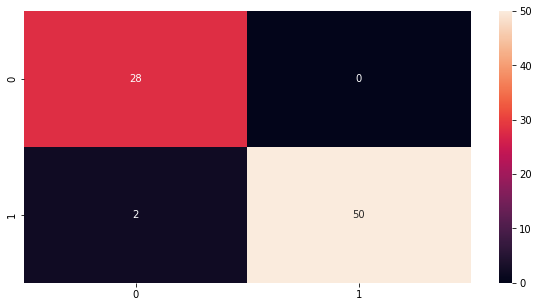

In [68]:
import seaborn as sns
plt.figure(figsize=(10,5))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [69]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.96      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80

